<a href="https://colab.research.google.com/github/gamal-abdelhakm/SalesPredictor/blob/main/AI_Talents_League_Round_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Description: Just a Regression problem to warm up in the best way
---
# Problem:
## The dataset likely represents sales data for various products across different outlets.
## The goal might be to predict 'item_outlet_sales' (the target variable) based on product features and outlet characteristics.
---
# Columns:
###'X1': **product_identifier**: Unique identifier for each product.
###'X2': **weight**: Weight of the product.
###'X3': **fat_content**: Type of fat content (e.g., 'Regular', 'low fat').
###'X4': **visibility**:  Product's visibility in the store.
###'X5': **product_category**: Category the product belongs to.
###'X6': **price**: Price of the product.
###'X7': **outlet_identifier**: Unique identifier for each outlet.
###'X8': **outlet_establishment_year**: Year the outlet was established.
###'X9': **outlet_size**: Size of the outlet (e.g., 'Small', 'Medium', 'High').
###'X10': **outlet_location_type**: Location type of the outlet (e.g., 'Tier 1', 'Tier 2').
###'X11': **outlet_type**: Type of the outlet (e.g., 'Supermarket Type1').
###'Y': **item_outlet_sales**: Sales of the product in the respective outlet. the target variable for prediction.

In [1]:
# import all nessesry laibrarys to build a regresion model\
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ai-talents-league-round-1
!unzip ai-talents-league-round-1.zip

Saving kaggle.json to kaggle.json
  0% 0.00/179k [00:00<?, ?B/s]
100% 179k/179k [00:00<00:00, 9.37MB/s]
Archive:  ai-talents-league-round-1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
df = pd.read_csv('train.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90


In [4]:
# Rename columns for better understanding
df = df.rename(columns={
    'X1': 'product_identifier',
    'X2': 'weight',
    'X3': 'fat_content',
    'X4': 'visibility',
    'X5': 'product_category',
    'X6': 'price',
    'X7': 'outlet_identifier',
    'X8': 'outlet_establishment_year',
    'X9': 'outlet_size',
    'X10': 'outlet_location_type',
    'X11': 'outlet_type',
    'Y': 'item_outlet_sales'
})
df.head()

,product_identifier,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   product_identifier         6000 non-null   object 
 1   weight                     4994 non-null   float64
 2   fat_content                6000 non-null   object 
 3   visibility                 6000 non-null   float64
 4   product_category           6000 non-null   object 
 5   price                      6000 non-null   float64
 6   outlet_identifier          6000 non-null   object 
 7   outlet_establishment_year  6000 non-null   int64  
 8   outlet_size                4289 non-null   object 
 9   outlet_location_type       6000 non-null   object 
 10  outlet_type                6000 non-null   object 
 11  item_outlet_sales          6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


In [6]:
df.describe()

,weight,visibility,price,outlet_establishment_year,item_outlet_sales
count,4994.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,12.956536,0.066333,141.228200,1997.840333,7.303403
std,4.658851,0.051492,62.540569,8.334412,1.014361
min,4.555000,0.000000,31.290000,1985.000000,3.510000
25%,8.895000,0.027030,94.037650,1987.000000,6.750000
50%,12.800000,0.054620,143.197000,1999.000000,7.500000
75%,17.100000,0.095154,186.522050,2004.000000,8.040000
max,21.350000,0.328391,266.888400,2009.000000,9.400000


## 1- Explore

In [7]:
df.isnull().sum()

,0
product_identifier,0
weight,1006
fat_content,0
visibility,0
product_category,0
price,0
outlet_identifier,0
outlet_establishment_year,0
outlet_size,1711
outlet_location_type,0


In [8]:
df.duplicated().sum()

0

## 2- Preprocessing

### 1- product_identifier

In [9]:
# It has high cardinality (1553 unique values) which may lead to overfitting and poor generalization
df['product_identifier'].nunique()

1553

In [10]:
df['product_identifier'].str[:3].value_counts()

,count
product_identifier,
FDT,198
FDX,196
FDR,196
FDY,195
FDS,195
...,...
DRP,10
DRO,10
DRZ,9


In [11]:
df['product_identifier'].str[:2].value_counts()

,count
product_identifier,
FD,4335
NC,1102
DR,563


In [12]:
df['brand'] = df['product_identifier'].str[:2]
df.head()

,product_identifier,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,brand
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90,NC


### 2-  weight

In [13]:
df['weight'].isnull().sum()

1006

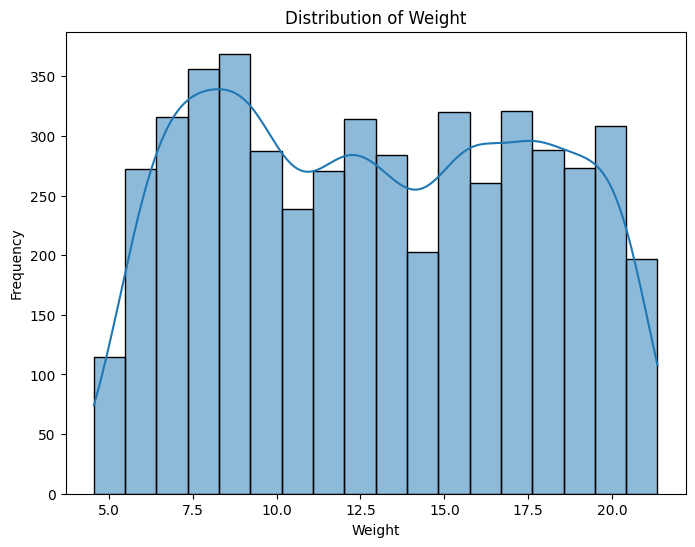

In [14]:
# Create a histogram to visualize the distribution of 'weight' and identify potential outliers.
plt.figure(figsize=(8, 6))
sns.histplot(df['weight'], kde=True)  # Include a kernel density estimate (KDE) for a smoother representation
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [15]:
# There is no outliesrs and the distribution is approximately symmetric.
df['weight'].skew()

0.05181360447530963

In [16]:
# The median would be a reasonable choice as well, but since the skew is very low, mean will work well enough.
df['weight'] = df['weight'].fillna(df['weight'].mean())
df['weight'].isnull().sum()

0

### 3- fat_content

In [17]:
df['fat_content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
# Standardize 'fat_content' values
df['fat_content'] = df['fat_content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df['fat_content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

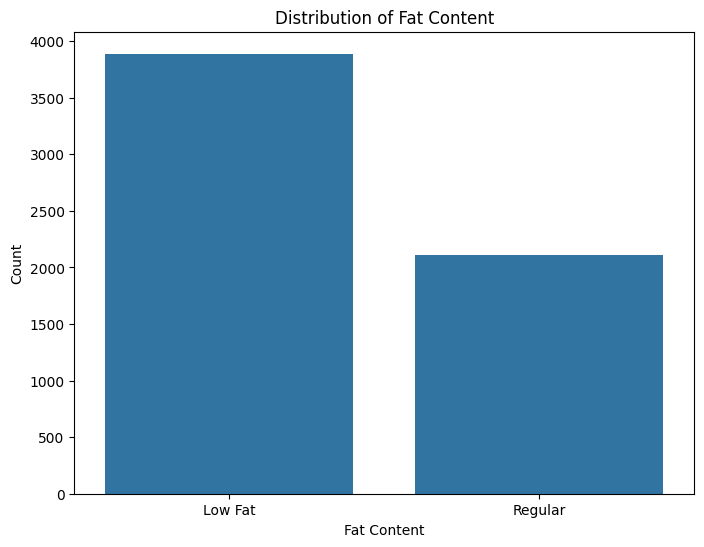

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fat_content', data=df)
plt.title('Distribution of Fat Content')
plt.xlabel('Fat Content')
plt.ylabel('Count')
plt.show()

### 4- visibility


In [20]:
df['visibility'].describe()

,visibility
count,6000.000000
mean,0.066333
std,0.051492
min,0.000000
25%,0.027030
50%,0.054620
75%,0.095154
max,0.328391


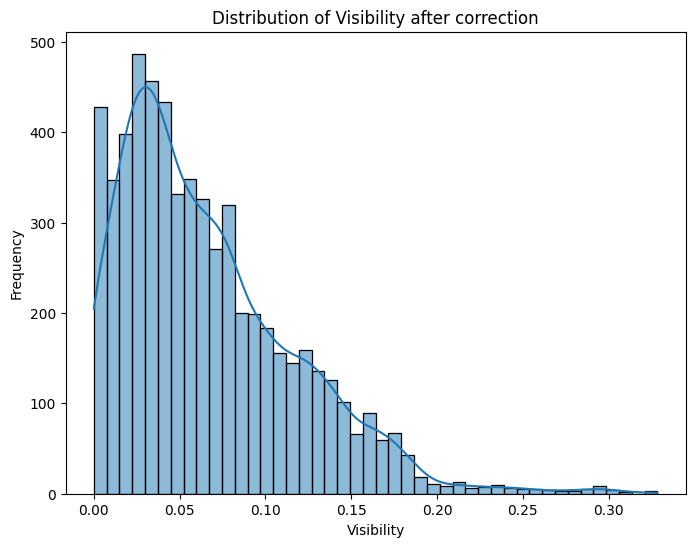

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['visibility'], kde=True)
plt.title('Distribution of Visibility after correction')
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.show()

### 5- product_category

In [22]:
df['product_category'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

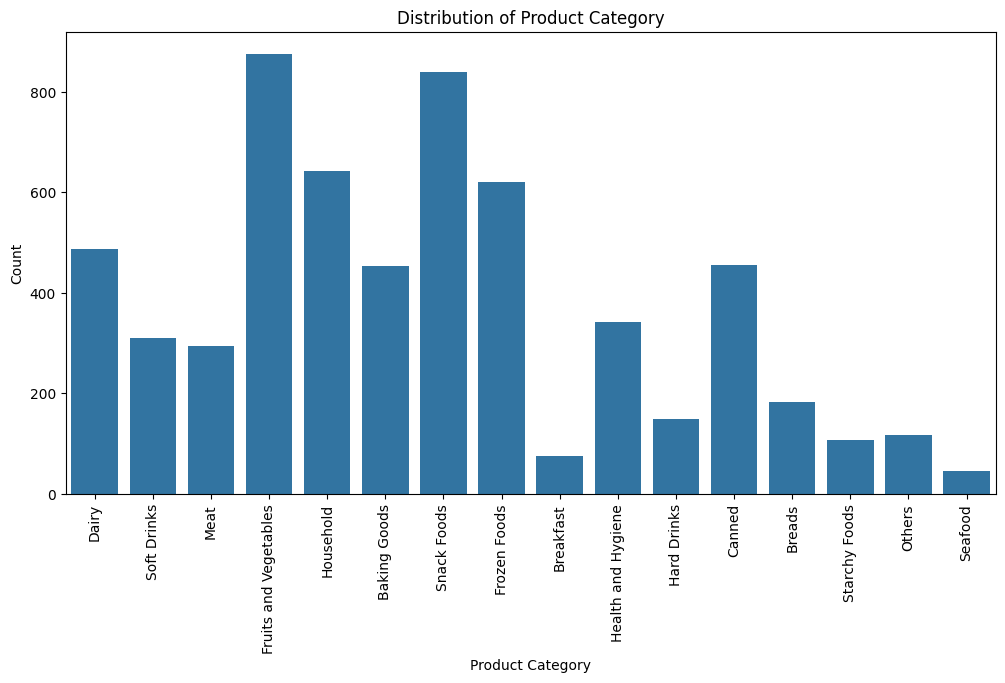

In [23]:
df['product_category'].nunique()
plt.figure(figsize=(12, 6))
sns.countplot(x='product_category', data=df)
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### 6- price

In [24]:
df['price'].describe()

,price
count,6000.000000
mean,141.228200
std,62.540569
min,31.290000
25%,94.037650
50%,143.197000
75%,186.522050
max,266.888400


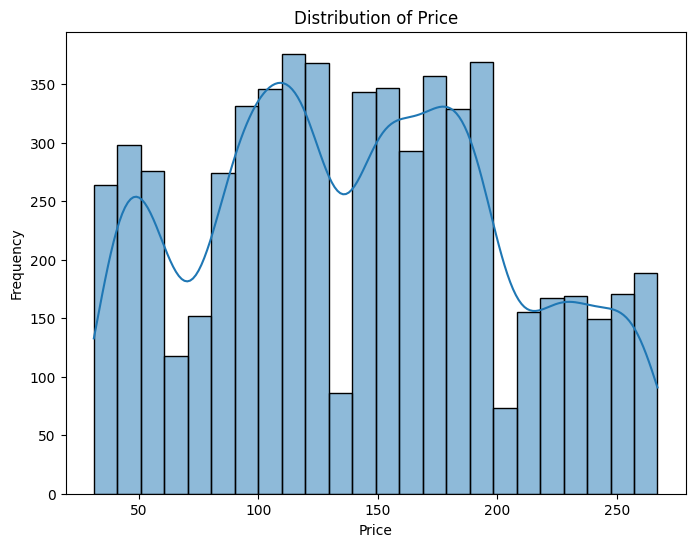

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### 7- outlet_identifier

In [26]:
df['outlet_identifier'].nunique()

10

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

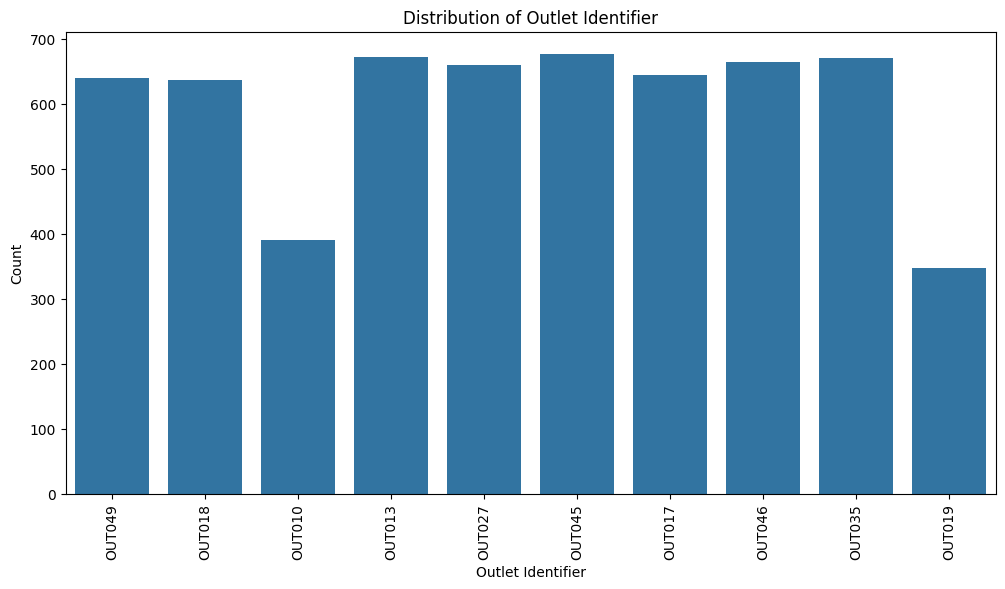

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='outlet_identifier', data=df)
plt.title('Distribution of Outlet Identifier')
plt.xlabel('Outlet Identifier')
plt.ylabel('Count')
plt.xticks(rotation=90)

### 8- outlet_establishment_year

In [28]:
df['outlet_establishment_year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [29]:
# Convert 'outlet_establishment_year' to the number of years since establishment
df['outlet_age'] = datetime.datetime.now().year - df['outlet_establishment_year']
df.head()

,product_identifier,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,brand,outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23,FD,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09,DR,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65,FD,26
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60,FD,27
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90,NC,38


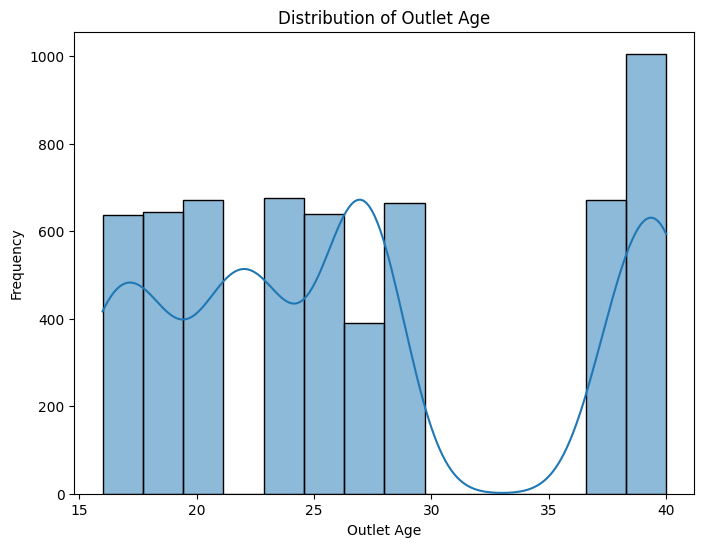

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['outlet_age'], kde=True)
plt.title('Distribution of Outlet Age')
plt.xlabel('Outlet Age')
plt.ylabel('Frequency')
plt.show()

### 9- outlet_size

In [31]:
df['outlet_size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [32]:
df['outlet_size'] = df['outlet_size'].fillna(df['outlet_size'].mode()[0])
df['outlet_size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

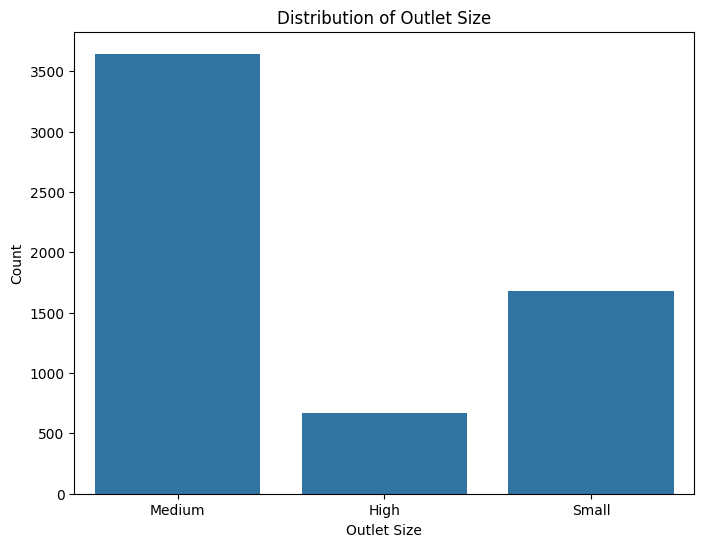

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='outlet_size', data=df)
plt.title('Distribution of Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()

### 10- outlet_location_type

In [34]:
df['outlet_location_type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

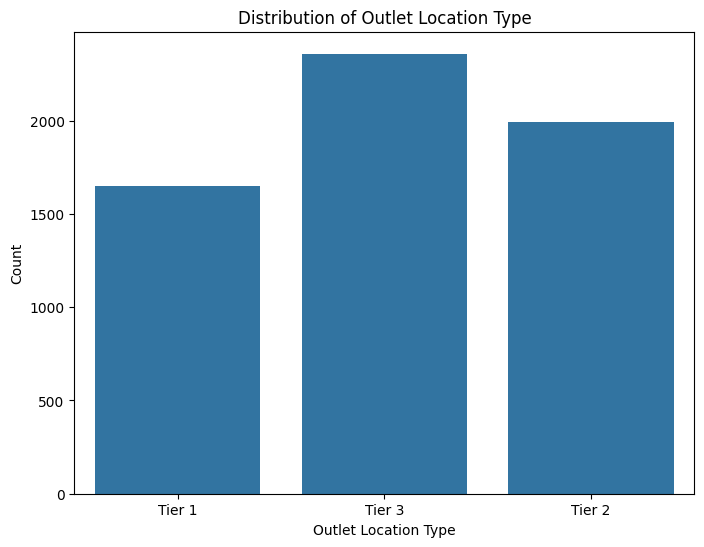

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='outlet_location_type', data=df)
plt.title('Distribution of Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.show()

### 11- outlet_type

In [36]:
df['outlet_type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

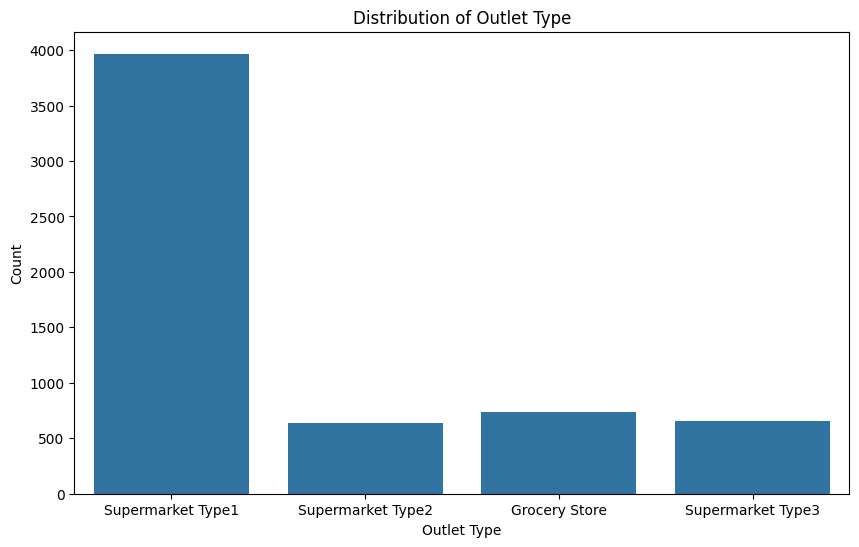

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='outlet_type', data=df)
plt.title('Distribution of Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.show()

### 12- item_outlet_sales (Target)

In [38]:
df['item_outlet_sales'].describe()

,item_outlet_sales
count,6000.000000
mean,7.303403
std,1.014361
min,3.510000
25%,6.750000
50%,7.500000
75%,8.040000
max,9.400000


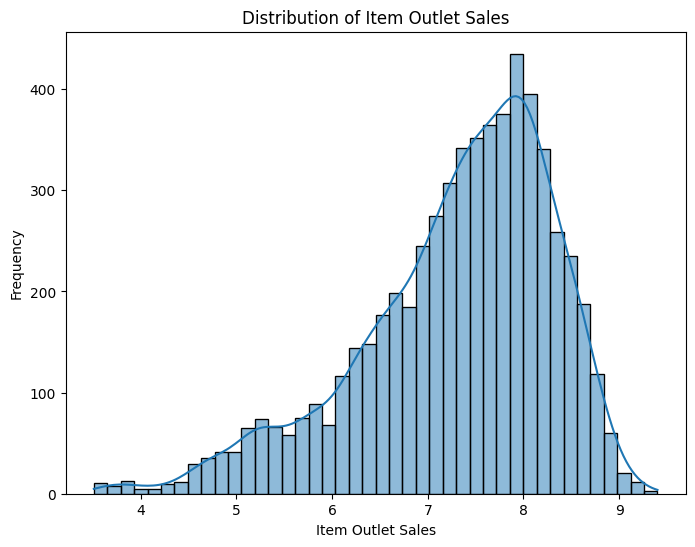

In [39]:
df['item_outlet_sales'].describe()
plt.figure(figsize=(8, 6))
sns.histplot(df['item_outlet_sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

## 3- Encoding

In [40]:
df_cleaned = df.drop(columns=['product_identifier','outlet_establishment_year'])
df_cleaned.head()

,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,brand,outlet_age
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,8.23,FD,26
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,6.09,DR,16
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,7.65,FD,26
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,6.60,FD,27
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,6.90,NC,38


In [41]:
# Use Label Encoding or Manual Encoding due to potential ordinal relationships
df_cleaned['outlet_size'] = df_cleaned['outlet_size'].map({'Small': 0, 'Medium': 1, 'High': 2})
df_cleaned['outlet_location_type'] = df_cleaned['outlet_location_type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
df_cleaned.head()

,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,brand,outlet_age
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,8.23,FD,26
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,6.09,DR,16
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,7.65,FD,26
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1,2,Grocery Store,6.60,FD,27
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,2,2,Supermarket Type1,6.90,NC,38


In [42]:
# Create dummy variables for categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)
df_encoded.head()

,weight,visibility,price,outlet_size,outlet_location_type,item_outlet_sales,outlet_age,fat_content_Regular,product_category_Breads,product_category_Breakfast,...,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3,brand_FD,brand_NC
0,9.30,0.016047,249.8092,1,0,8.23,26,False,False,False,...,False,False,False,False,True,True,False,False,True,False
1,5.92,0.019278,48.2692,1,2,6.09,16,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,17.50,0.016760,141.6180,1,0,7.65,26,False,False,False,...,False,False,False,False,True,True,False,False,True,False
3,19.20,0.000000,182.0950,1,2,6.60,27,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,8.93,0.000000,53.8614,2,2,6.90,38,False,False,False,...,False,False,False,False,False,True,False,False,False,True


## 4- Features Selection

In [88]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor

In [89]:
# a. Correlation with Target:
correlations = df_encoded.corr()['item_outlet_sales'].abs().sort_values(ascending=False)
selected_features_corr = correlations[correlations > 0.1].index.tolist()  # Adjust threshold if needed
selected_features_corr.remove('item_outlet_sales')
selected_features_corr

['price',
 'outlet_identifier_OUT019',
 'outlet_type_Supermarket Type1',
 'outlet_identifier_OUT027',
 'outlet_type_Supermarket Type3',
 'visibility',
 'outlet_size']

In [90]:
selector = VarianceThreshold(threshold=0.05)  # Adjust threshold if needed
X_selected_var = selector.fit_transform(df_encoded.drop(columns=['item_outlet_sales']))
selected_features_var = df_encoded.drop(columns=['item_outlet_sales']).columns[selector.get_support()].tolist()
selected_features_var


['weight',
 'price',
 'outlet_size',
 'outlet_location_type',
 'outlet_age',
 'fat_content_Regular',
 'product_category_Canned',
 'product_category_Dairy',
 'product_category_Frozen Foods',
 'product_category_Fruits and Vegetables',
 'product_category_Health and Hygiene',
 'product_category_Household',
 'product_category_Snack Foods',
 'outlet_identifier_OUT013',
 'outlet_identifier_OUT017',
 'outlet_identifier_OUT018',
 'outlet_identifier_OUT019',
 'outlet_identifier_OUT027',
 'outlet_identifier_OUT035',
 'outlet_identifier_OUT045',
 'outlet_identifier_OUT046',
 'outlet_identifier_OUT049',
 'outlet_type_Supermarket Type1',
 'outlet_type_Supermarket Type2',
 'outlet_type_Supermarket Type3',
 'brand_FD',
 'brand_NC']

In [91]:
# Combine features selected by both filter methods:
selected_features_filter = list(set(selected_features_corr + selected_features_var))
selected_features_filter

['outlet_identifier_OUT019',
 'outlet_identifier_OUT017',
 'outlet_identifier_OUT018',
 'outlet_identifier_OUT013',
 'outlet_size',
 'outlet_type_Supermarket Type2',
 'fat_content_Regular',
 'product_category_Canned',
 'outlet_identifier_OUT027',
 'product_category_Dairy',
 'outlet_identifier_OUT045',
 'outlet_identifier_OUT049',
 'product_category_Fruits and Vegetables',
 'outlet_age',
 'product_category_Frozen Foods',
 'outlet_identifier_OUT035',
 'brand_FD',
 'product_category_Snack Foods',
 'outlet_location_type',
 'brand_NC',
 'product_category_Health and Hygiene',
 'outlet_type_Supermarket Type1',
 'visibility',
 'price',
 'outlet_identifier_OUT046',
 'weight',
 'product_category_Household',
 'outlet_type_Supermarket Type3']

In [93]:
# 2. Embedded Method (Random Forest Feature Importance):
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(df_encoded[selected_features_filter], df_encoded['item_outlet_sales'])
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=selected_features_filter)
feature_importances_rf = feature_importances_rf.abs().sort_values(ascending=False)
feature_importances_rf

,0
price,0.370273
outlet_identifier_OUT019,0.181924
outlet_type_Supermarket Type1,0.088673
visibility,0.075997
outlet_age,0.073950
weight,0.045395
outlet_identifier_OUT018,0.040470
outlet_type_Supermarket Type2,0.032197
outlet_identifier_OUT027,0.016373
outlet_type_Supermarket Type3,0.012271


In [94]:
# Select top k features based on importance (e.g., top 10):
selected_features_final = feature_importances_rf.head(10).index.tolist()  # Adjust k if needed
selected_features_final


['price',
 'outlet_identifier_OUT019',
 'outlet_type_Supermarket Type1',
 'visibility',
 'outlet_age',
 'weight',
 'outlet_identifier_OUT018',
 'outlet_type_Supermarket Type2',
 'outlet_identifier_OUT027',
 'outlet_type_Supermarket Type3']

In [95]:
df_encoded_corr = df_encoded[selected_features_final]
df_encoded_corr.head()

,price,outlet_identifier_OUT019,outlet_type_Supermarket Type1,visibility,outlet_age,weight,outlet_identifier_OUT018,outlet_type_Supermarket Type2,outlet_identifier_OUT027,outlet_type_Supermarket Type3
0,249.8092,False,True,0.016047,26,9.30,False,False,False,False
1,48.2692,False,False,0.019278,16,5.92,True,True,False,False
2,141.6180,False,True,0.016760,26,17.50,False,False,False,False
3,182.0950,False,False,0.000000,27,19.20,False,False,False,False
4,53.8614,False,True,0.000000,38,8.93,False,False,False,False


# 5- Model Selection

In [107]:
#X = df_encoded.drop(columns=['item_outlet_sales'])
X = df_encoded_corr
y = df_encoded['item_outlet_sales']

In [108]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
# Normalization !! same results
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [145]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.30954381302772344
R-squared: 0.711706208917416


In [147]:
# Define a dictionary of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [148]:
# Evaluate each model using cross-validation and store results
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)  # Use appropriate scoring metric
    results[model_name] = -scores.mean()  # Convert negative MSE to positive
results

{'Linear Regression': 0.29229588946612883,
 'Decision Tree': 0.57324055,
 'Random Forest': 0.31906942856,
 'Gradient Boosting': 0.2773778803755908}

In [149]:
# Select the best model based on lowest MSE
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nBest Model: {best_model_name}")
print(f"Mean Squared Error (Test Set): {mse}")
print(f"R-squared (Test Set): {r2}")


Best Model: Gradient Boosting
Mean Squared Error (Test Set): 0.26823936410691074
R-squared (Test Set): 0.750175128878971


In [150]:
# Assuming 'best_model' is the best model identified previously (e.g., RandomForestRegressor)
# Assuming 'selected_features_final' contains your selected features

# Prepare training data
X_train = df_encoded[selected_features_final]  # Use all training data
y_train = df_encoded['item_outlet_sales']

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Train the best model on all training data
best_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#6- Perform on Trining

In [151]:
# Load and Preprocess Test Data:
test_df = pd.read_csv('test.csv')

# Rename columns to match training data
test_df = test_df.rename(columns={
    'X1': 'product_identifier',
    'X2': 'weight',
    'X3': 'fat_content',
    'X4': 'visibility',
    'X5': 'product_category',
    'X6': 'price',
    'X7': 'outlet_identifier',
    'X8': 'outlet_establishment_year',
    'X9': 'outlet_size',
    'X10': 'outlet_location_type',
    'X11': 'outlet_type',
})
test_df

,product_identifier,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDO37,NaN,Low Fat,0.021273,Breakfast,229.1326,OUT027,1985,Medium,Tier 3,Supermarket Type3
1,FDV13,17.350,Regular,0.027588,Canned,86.1856,OUT013,1987,High,Tier 3,Supermarket Type1
2,FDF52,9.300,Low Fat,0.111782,Frozen Foods,182.3292,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDY11,6.710,Regular,0.029606,Baking Goods,65.4142,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,FDL20,17.100,Low Fat,0.129141,Fruits and Vegetables,109.4886,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
2518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
2519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
2520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
2521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [152]:
# Feature Engineering
test_df['brand'] = test_df['product_identifier'].str[:2]
test_df['outlet_age'] = datetime.datetime.now().year - test_df['outlet_establishment_year']
test_df


,product_identifier,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,brand,outlet_age
0,FDO37,NaN,Low Fat,0.021273,Breakfast,229.1326,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD,40
1,FDV13,17.350,Regular,0.027588,Canned,86.1856,OUT013,1987,High,Tier 3,Supermarket Type1,FD,38
2,FDF52,9.300,Low Fat,0.111782,Frozen Foods,182.3292,OUT010,1998,NaN,Tier 3,Grocery Store,FD,27
3,FDY11,6.710,Regular,0.029606,Baking Goods,65.4142,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,26
4,FDL20,17.100,Low Fat,0.129141,Fruits and Vegetables,109.4886,OUT017,2007,NaN,Tier 2,Supermarket Type1,FD,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,FD,38
2519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,FD,23
2520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,NC,21
2521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,FD,16


In [153]:
# Data Cleaning
test_df['weight'] = test_df['weight'].fillna(df['weight'].mean())  # Use training data mean for imputation
test_df['fat_content'] = test_df['fat_content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
test_df['outlet_size'] = test_df['outlet_size'].fillna(df['outlet_size'].mode()[0]) # Use training data mode for imputation

In [154]:
# Encoding Categorical Features
test_df['outlet_size'] = test_df['outlet_size'].map({'Small': 0, 'Medium': 1, 'High': 2})
test_df['outlet_location_type'] = test_df['outlet_location_type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
test_df

,product_identifier,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,brand,outlet_age
0,FDO37,12.956536,Low Fat,0.021273,Breakfast,229.1326,OUT027,1985,1,2,Supermarket Type3,FD,40
1,FDV13,17.350000,Regular,0.027588,Canned,86.1856,OUT013,1987,2,2,Supermarket Type1,FD,38
2,FDF52,9.300000,Low Fat,0.111782,Frozen Foods,182.3292,OUT010,1998,1,2,Grocery Store,FD,27
3,FDY11,6.710000,Regular,0.029606,Baking Goods,65.4142,OUT049,1999,1,0,Supermarket Type1,FD,26
4,FDL20,17.100000,Low Fat,0.129141,Fruits and Vegetables,109.4886,OUT017,2007,1,1,Supermarket Type1,FD,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,2,2,Supermarket Type1,FD,38
2519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,Supermarket Type1,FD,23
2520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,1,Supermarket Type1,NC,21
2521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,Supermarket Type2,FD,16


In [155]:
test_df.drop(columns=['product_identifier','outlet_establishment_year'], inplace=True)
test_df

,weight,fat_content,visibility,product_category,price,outlet_identifier,outlet_size,outlet_location_type,outlet_type,brand,outlet_age
0,12.956536,Low Fat,0.021273,Breakfast,229.1326,OUT027,1,2,Supermarket Type3,FD,40
1,17.350000,Regular,0.027588,Canned,86.1856,OUT013,2,2,Supermarket Type1,FD,38
2,9.300000,Low Fat,0.111782,Frozen Foods,182.3292,OUT010,1,2,Grocery Store,FD,27
3,6.710000,Regular,0.029606,Baking Goods,65.4142,OUT049,1,0,Supermarket Type1,FD,26
4,17.100000,Low Fat,0.129141,Fruits and Vegetables,109.4886,OUT017,1,1,Supermarket Type1,FD,18
...,...,...,...,...,...,...,...,...,...,...,...
2518,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,2,2,Supermarket Type1,FD,38
2519,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,1,1,Supermarket Type1,FD,23
2520,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,0,1,Supermarket Type1,NC,21
2521,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,1,2,Supermarket Type2,FD,16


In [156]:
categorical_cols = test_df.select_dtypes(include=['object']).columns
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)
test_df_encoded

,weight,visibility,price,outlet_size,outlet_location_type,outlet_age,fat_content_Regular,product_category_Breads,product_category_Breakfast,product_category_Canned,...,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3,brand_FD,brand_NC
0,12.956536,0.021273,229.1326,1,2,40,False,False,True,False,...,True,False,False,False,False,False,False,True,True,False
1,17.350000,0.027588,86.1856,2,2,38,True,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,9.300000,0.111782,182.3292,1,2,27,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6.710000,0.029606,65.4142,1,0,26,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False
4,17.100000,0.129141,109.4886,1,1,18,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,6.865000,0.056783,214.5218,2,2,38,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2519,8.380000,0.046982,108.1570,1,1,23,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2520,10.600000,0.035186,85.1224,0,1,21,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2521,7.210000,0.145221,103.1332,1,2,16,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [157]:
test_df_final = test_df_encoded[selected_features_final]
test_df_final

,price,outlet_identifier_OUT019,outlet_type_Supermarket Type1,visibility,outlet_age,weight,outlet_identifier_OUT018,outlet_type_Supermarket Type2,outlet_identifier_OUT027,outlet_type_Supermarket Type3
0,229.1326,False,False,0.021273,40,12.956536,False,False,True,True
1,86.1856,False,True,0.027588,38,17.350000,False,False,False,False
2,182.3292,False,False,0.111782,27,9.300000,False,False,False,False
3,65.4142,False,True,0.029606,26,6.710000,False,False,False,False
4,109.4886,False,True,0.129141,18,17.100000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2518,214.5218,False,True,0.056783,38,6.865000,False,False,False,False
2519,108.1570,False,True,0.046982,23,8.380000,False,False,False,False
2520,85.1224,False,True,0.035186,21,10.600000,False,False,False,False
2521,103.1332,False,False,0.145221,16,7.210000,True,True,False,False


In [158]:
# Make predictions on the scaled test data
y_pred_test = best_model.predict(test_df_final)
y_pred_test

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


array([8.39420303, 8.39420303, 8.52112131, ..., 8.39420303, 8.52112131,
       8.39420303])